WeatherPy
----

# Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

## Generate Cities List

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}"

#target_url = query_url + city.replace(" ", "+") + units
#response = requests.get(target_url)
#response_json = response.json()
#response_json

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

#counters
record_num =1
set_num = 1

for i, city in enumerate(cities):
   #create groups of 50
    if (i% 50 == 0 and i >= 50):
        set_num += 1
        record_num = 0
        
    #url for the loop to run through
    city_url = query_url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    print("Processing Record {} of Set {} | {}".format(record_num, set_num, city))
    
    #update record_num within the loop
    record_num += 1
    
    #request info on each city
    try:
        city_response = requests.get(city_url).json()
        
        #within this response find the data necessary for DataFrame
        city_lat = city_response["coord"]["lat"]
        city_lon = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_cloudiness = city_response["clouds"]["all"]
        city_windspeed = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        #append the city info to empty list
        city_data.append({"City": city,
                         "Lat": city_lat, 
                         "Lng": city_lon,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_cloudiness, 
                         "Wind Speed": city_windspeed,
                         "Country": city_country, 
                         "Date": city_date})
    #if no city info is found, skip
    except:
        print("City not found. Skipping ...")
        pass
    
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")    




Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | pochutla
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | awbari
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | arraial do cabo


Processing Record 37 of Set 4 | port blair
Processing Record 38 of Set 4 | bosaso
Processing Record 39 of Set 4 | chivolo
Processing Record 40 of Set 4 | poptun
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping ...
Processing Record 42 of Set 4 | ponta delgada
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | borogontsy
Processing Record 49 of Set 4 | chicama
Processing Record 0 of Set 5 | cockburn town
Processing Record 1 of Set 5 | pacific grove
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | nizhnyaya tavda
Processing Record 4 of Set 5 | svetlogorsk
Processing Record 5 of Set 5 | mabaruma
Processing Record 6 of Set 5 | kyrylivka
Processing Record 7 of Set 5 | nhulunbuy
Processing Record 8 of Set 5 | palabuhanratu
City not found. Skipping ...


Processing Record 25 of Set 8 | cap malheureux
Processing Record 26 of Set 8 | gushi
Processing Record 27 of Set 8 | mishan
Processing Record 28 of Set 8 | gao
Processing Record 29 of Set 8 | provideniya
Processing Record 30 of Set 8 | kerewan
Processing Record 31 of Set 8 | alghero
Processing Record 32 of Set 8 | saveh
Processing Record 33 of Set 8 | orsha
Processing Record 34 of Set 8 | abu zabad
Processing Record 35 of Set 8 | birin
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | lakes entrance
Processing Record 38 of Set 8 | sakakah
Processing Record 39 of Set 8 | bargal
City not found. Skipping ...
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | manzhouli
Processing Record 42 of Set 8 | boca do acre
Processing Record 43 of Set 8 | kedrovka
Processing Record 44 of Set 8 | galveston
Processing Record 45 of Set 8 | koumac
Processing Record 46 of Set 8 | sahrak
City not found. Skipping ...
Processing Record 47 of Set 8 | nome
Proc

Processing Record 15 of Set 12 | lunsar
Processing Record 16 of Set 12 | vuktyl
Processing Record 17 of Set 12 | saint-ambroise
Processing Record 18 of Set 12 | tombouctou
Processing Record 19 of Set 12 | great yarmouth
Processing Record 20 of Set 12 | veraval
Processing Record 21 of Set 12 | schruns
Processing Record 22 of Set 12 | nisia floresta
Processing Record 23 of Set 12 | windhoek
Processing Record 24 of Set 12 | lakshmipur
Processing Record 25 of Set 12 | russell
Processing Record 26 of Set 12 | ilawa
Processing Record 27 of Set 12 | canitas
City not found. Skipping ...
Processing Record 28 of Set 12 | san francisco de macoris
Processing Record 29 of Set 12 | sinegorye
Processing Record 30 of Set 12 | ilulissat
Processing Record 31 of Set 12 | acapulco
Processing Record 32 of Set 12 | minggang
Processing Record 33 of Set 12 | itapetininga
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | padang
Processing Record 36 of Set 12 | koslan
Processing Record 37 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#city_dict = {'City': city, 'Lat': [lat], 'Lng': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date}
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,77.23,68,97,8.75,PF,1618691924
1,kruisfontein,-34.0033,24.7314,61.43,40,32,2.86,ZA,1618691925
2,thompson,55.7435,-97.8558,33.80,60,90,11.50,CA,1618691811
3,pochutla,15.7432,-96.4661,89.01,58,40,11.50,MX,1618691925
4,atuona,-9.8000,-139.0333,80.31,76,46,18.92,PF,1618691926
...,...,...,...,...,...,...,...,...,...
554,baiquan,47.5833,126.0833,35.92,85,0,6.20,CN,1618692164
555,ketchikan,55.3422,-131.6461,53.60,54,1,11.50,US,1618692165
556,yangliuqing,39.1375,116.9997,53.60,30,0,6.71,CN,1618692165
557,namwala,-15.7504,26.4384,60.28,69,100,5.12,ZM,1618692166


In [7]:
city_df.to_csv("output.csv", index=False)

In [8]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.564621,19.049555,58.975564,69.636852,54.220036,7.890376,1.618692e+09
std,33.290957,88.997743,22.075855,21.956591,39.408620,5.216830,9.038932e+01
min,-54.800000,-179.166700,-23.480000,5.000000,0.000000,0.580000,1.618692e+09
25%,-6.371000,-55.570050,45.000000,57.000000,12.000000,4.000000,1.618692e+09
50%,24.344800,22.957300,62.440000,75.000000,64.000000,6.910000,1.618692e+09
75%,48.391700,96.147600,77.000000,87.000000,95.000000,10.360000,1.618692e+09
max,78.218600,178.416700,105.010000,100.000000,100.000000,34.850000,1.618692e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

idx = city_df.index[city_df['Humidity']]
idx

Int64Index([68, 40, 60, 58, 76, 89, 71, 66, 78, 83,
            ...
            90, 75, 51, 95, 71, 85, 54, 30, 69, 93],
           dtype='int64', length=559)

In [10]:

new_city_df = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index)
new_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.564621,19.049555,58.975564,69.636852,54.220036,7.890376,1.618692e+09
std,33.290957,88.997743,22.075855,21.956591,39.408620,5.216830,9.038932e+01
min,-54.800000,-179.166700,-23.480000,5.000000,0.000000,0.580000,1.618692e+09
25%,-6.371000,-55.570050,45.000000,57.000000,12.000000,4.000000,1.618692e+09
50%,24.344800,22.957300,62.440000,75.000000,64.000000,6.910000,1.618692e+09
75%,48.391700,96.147600,77.000000,87.000000,95.000000,10.360000,1.618692e+09
max,78.218600,178.416700,105.010000,100.000000,100.000000,34.850000,1.618692e+09


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index, inplace=False)
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,77.23,68,97,8.75,PF,1618691924
1,kruisfontein,-34.0033,24.7314,61.43,40,32,2.86,ZA,1618691925
2,thompson,55.7435,-97.8558,33.80,60,90,11.50,CA,1618691811
3,pochutla,15.7432,-96.4661,89.01,58,40,11.50,MX,1618691925
4,atuona,-9.8000,-139.0333,80.31,76,46,18.92,PF,1618691926
...,...,...,...,...,...,...,...,...,...
554,baiquan,47.5833,126.0833,35.92,85,0,6.20,CN,1618692164
555,ketchikan,55.3422,-131.6461,53.60,54,1,11.50,US,1618692165
556,yangliuqing,39.1375,116.9997,53.60,30,0,6.71,CN,1618692165
557,namwala,-15.7504,26.4384,60.28,69,100,5.12,ZM,1618692166


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

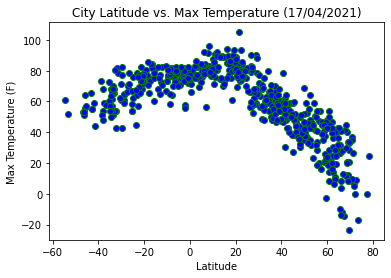

In [12]:
x_axis = clean_city_data['Lat']
temp = clean_city_data['Max Temp']
                           
plt.scatter(x_axis, temp, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (17/04/2021)")
plt.savefig("images/maxtemp.png")
plt.show()


## Latitude vs. Humidity Plot

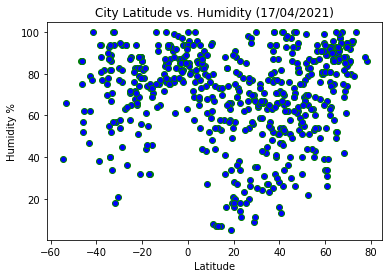

In [13]:
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity (17/04/2021)")
plt.savefig("images/humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

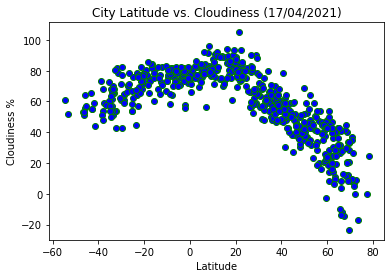

In [14]:
x_axis = clean_city_data['Lat']
clouds = clean_city_data['Max Temp']
plt.scatter(x_axis, clouds, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness (17/04/2021)")
plt.savefig("images/cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

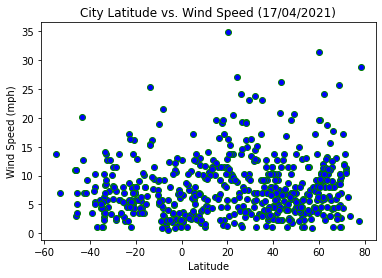

In [15]:
x_axis = clean_city_data['Lat']
speed = clean_city_data['Wind Speed']
plt.scatter(x_axis, speed, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (17/04/2021)")
plt.savefig("images/windspeed.png")
plt.show()


# # Linear Regression

In [16]:
#determine the north and south hemisphere to pull data from
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
#north_hemisphere
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
#south_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

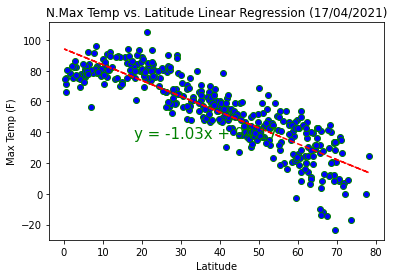

The r-squared value is 0.7629624668046916


In [17]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("N.Max Temp vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_maxtemp.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

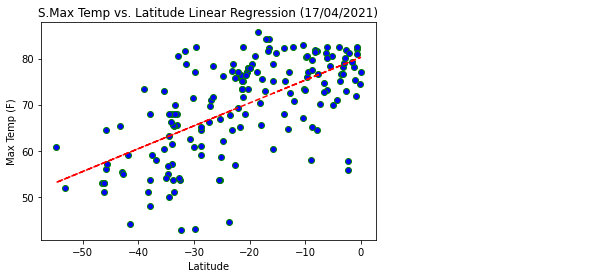

The r-squared value is 0.3979973054246886


In [18]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("S.Max Temp vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_maxtemp.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

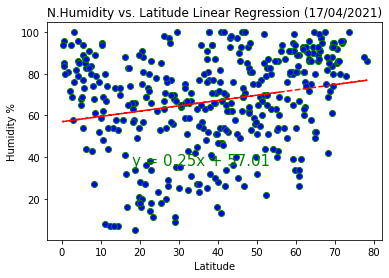

The r-squared value is 0.05063681370250364


In [19]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("N.Humidity vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_humidity.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

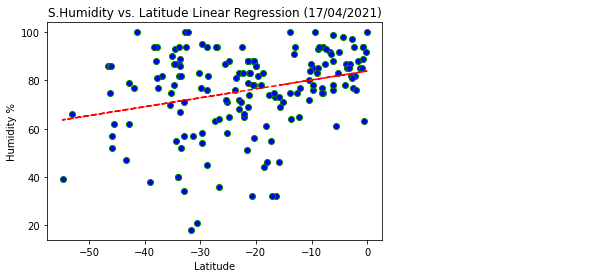

The r-squared value is 0.08001260076216576


In [20]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("S.Humidity vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_humidity.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

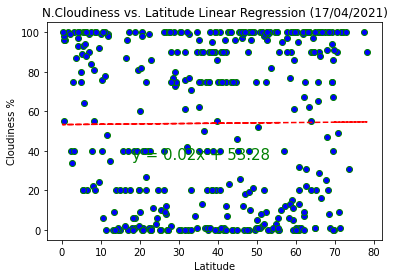

The r-squared value is 7.662585618383002e-05


In [21]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("N.Cloudiness vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_cloudines.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

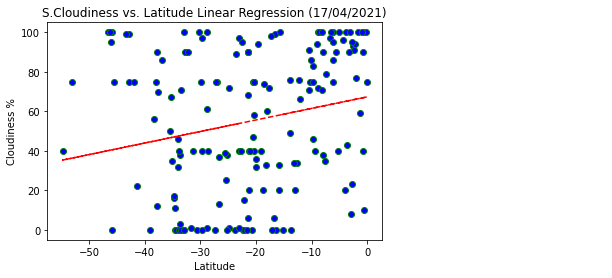

The r-squared value is 0.045453257459882976


In [22]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("S.Cloudiness vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_cloudiness.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

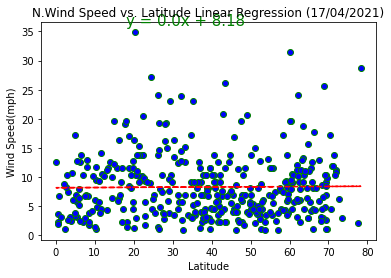

The r-squared value is 0.00012947334717879712


In [23]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("N.Wind Speed vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_windspeed.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

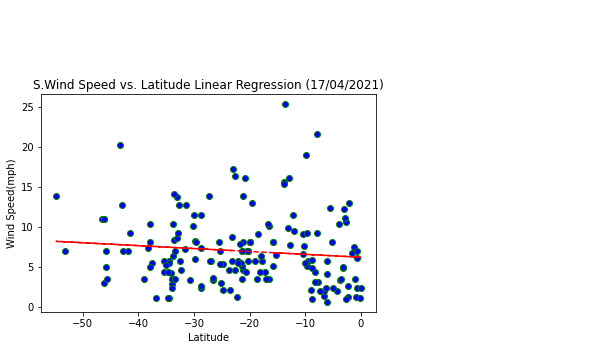

The r-squared value is 0.012043454465872645


In [24]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("S.Wind Speed vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_windspeed.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
